# QuantEcon: Python Programming for Economics and Finance 

Exercises from https://python-programming.quantecon.org/intro.html

## 3.6 Exercises (An Introductory Example)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12,6)

### Exercise 1
Simulate and plot the correlated time series 

$$ x_{t+1} = \alpha x_t + \varepsilon_{t+1} $$

where $x_0 = 0$, $t = 0, ..., T$, and the sequence of shocks $\{\varepsilon_t\}$ is assumed to be i.i.d. standard normal.

Let $T = 200$ and $\alpha = 0.9$.

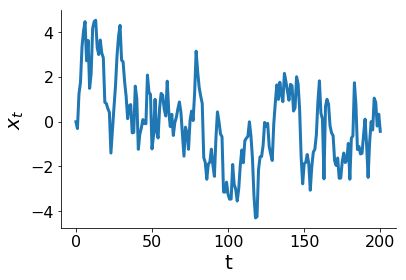

In [2]:
T = 200
α = 0.9 

ɛ_values = np.random.randn(T+1)

x_values = np.empty(T+1)
x_values[0] = 0

for i in range(T):
    x_values[i+1] = α * x_values[i] + ɛ_values[i+1]

plt.plot(x_values)
plt.xlabel('t')
plt.ylabel('$x_t$')
plt.show()

### Exercise 2
Starting with your solution to exercise 1, plot three simulated time series, one for each of the cases α=0, α=0.8 and α=0.98.

Use a for loop to step through the α values.

If you can, add a legend, to help distinguish between the three time series.

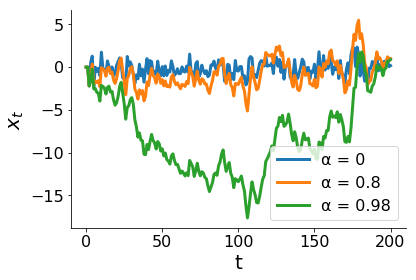

In [3]:
T = 200
α_values = [0, 0.8, 0.98]

ɛ_values = np.random.randn(T+1)

x_values = np.empty((T+1, len(α_values)))
x_values[0] = 0

for j in range(len(α_values)):
    for i in range(T):
        x_values[i+1,j] = α_values[j] * x_values[i,j] + ɛ_values[i+1]

# Could have included plots into for loop
plt.plot(x_values[:,0], label = 'α = ' + str(α_values[0]))
plt.plot(x_values[:,1], label = 'α = ' + str(α_values[1]))
plt.plot(x_values[:,2], label = 'α = ' + str(α_values[2]))

plt.legend()
plt.xlabel('t')
plt.ylabel('$x_t$')

plt.show()

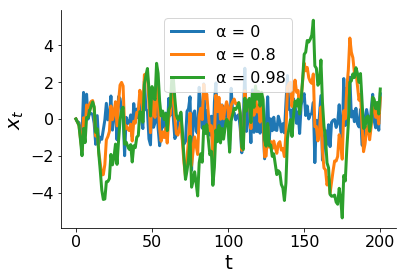

In [4]:
# Cleaner version after reading 5.4.2 Loops without Indices

T = 200
α_values = [0, 0.8, 0.98]

ɛ_values = np.random.randn(T+1)
x = np.empty(T+1)

for α in α_values:
    x[0]=0
    for i in range(T):
        x[i+1] = α * x[i] + ɛ_values[i+1]
    plt.plot(x, label = 'α = ' + str(α))

plt.legend()
plt.xlabel('t')
plt.ylabel('$x_t$')

plt.show()

### Exercise 3
Similar to the previous exercises, plot the time series

$$ x_{t+1} = α|x_t|+ \varepsilon_{t+1}$$

where $x_0=0$ and $t=0,...,T$. Use T=200, α=0.9 and {$\varepsilon_t$} as before.

Search online for a function that can be used to compute the absolute value $|x_t|$.

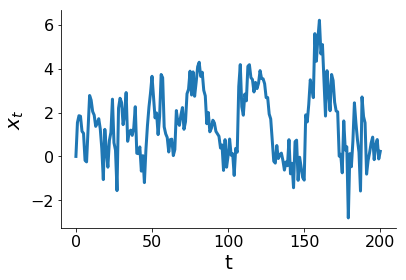

In [5]:
T = 200
α = 0.9 

ɛ_values = np.random.randn(T+1)

x_values = np.empty(T+1)
x_values[0] = 0

for i in range(T):
    x_values[i+1] = α * np.abs(x_values[i]) + ɛ_values[i+1]

plt.plot(x_values)
plt.xlabel('t')
plt.ylabel('$x_t$')
plt.show()

### Exercise 4
One important aspect of essentially all programming languages is branching and conditions.

In Python, conditions are usually implemented with if–else syntax.

Now, write a new solution to Exercise 3 that does not use an existing function to compute the absolute value.

Replace this existing function with an if–else condition

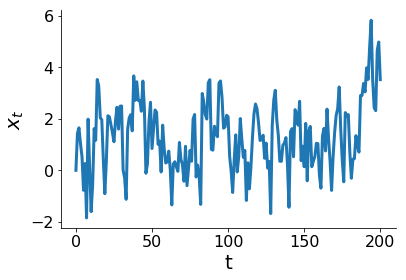

In [6]:
T = 200
α = 0.9 

ɛ_values = np.random.randn(T+1)

x_values = np.empty(T+1)
x_values[0] = 0

for i in range(T):
    if x_values[i] > 0:
        x_values[i+1] = α * x_values[i] + ɛ_values[i+1]
    else: 
        x_values[i+1] = - α * x_values[i] + ɛ_values[i+1]

plt.plot(x_values)
plt.xlabel('t')
plt.ylabel('$x_t$')
plt.show()

### Exercise 5
Here’s a harder exercise, that takes some thought and planning.

The task is to compute an approximation to π using Monte Carlo (https://en.wikipedia.org/wiki/Monte_Carlo_method).

Use no imports besides NumPy.

Your hints are as follows:

- If $U$ is a bivariate uniform random variable on the unit square $(0,1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$.

- If $U_1,...,U_n$ are i.i.d. copies of $U$, then, as $n$ gets large, the fraction that falls in $B$, converges to the probability of landing in $B$.

- For a circle, area=π∗radius$^2$.

In [7]:
# Monte-Carlo Simulations with one value of iterations
n = 10000
num_in = 0
  
for i in range(n):
    u_x = np.random.uniform(0,1)  
    u_y = np.random.uniform(0,1)
    dist = np.sqrt(u_x**2 + u_y**2)
    if dist < 1: 
        num_in += 1
    else:
        continue
    
π_approx = (num_in / n) * 4

print(π_approx)

3.14


In [8]:
# Monte-Carlo Simulations with multiple values of iterations
n = [1000, 5000, 10000, 50000]
num_in = np.zeros(len(n))
π_approx = np.empty(len(n))

for j in range(len(n)):    
    for i in range(n[j]):
        u_x = np.random.uniform(0,1)  
        u_y = np.random.uniform(0,1)
        dist = np.sqrt(u_x**2 + u_y**2)
        if dist < 1: 
            num_in[j] = num_in[j] + 1
        else:
            continue
    
    π_approx[j] = (num_in[j] / n[j]) * 4
    print('When n = ' + str(n[j]) + ', the approximation of π is ' + str(π_approx[j]))

When n = 1000, the approximation of π is 3.236
When n = 5000, the approximation of π is 3.1608
When n = 10000, the approximation of π is 3.1592
When n = 50000, the approximation of π is 3.14416


## 4.5 Exercises (Functions)

### Exercise 1
Recall that $n!$ is read as “n factorial” and defined as $n!=n\times(n−1)\times \cdots \times 2 \times 1$.

There are functions to compute this in various modules, but let’s write our own version as an exercise.

In particular, write a function factorial such that factorial(n) returns $n!$ for any positive integer $n$.

In [9]:
def factorial(n:int):
    """
    Calculates the factorial of the argument, i.e. factorial(3) = 3! = 3*2*1
    """
    mult = 1
    while n>0:
        mult = mult * n
        n = n-1
    return mult

In [10]:
factorial(2)

2

In [11]:
type(factorial(2))

int

In [12]:
factorial(3)

6

In [13]:
factorial(4)

24

In [14]:
factorial(5)

120

### Exercise 2
The binomial random variable $Y\sim Bin(n,p)$ represents the number of successes in $n$ binary trials, where each trial succeeds with probability $p$.

Without any import besides 'from numpy.random import uniform', write a function binomial_rv such that binomial_rv(n, p) generates one draw of $Y$.


In [15]:
def binomial_rv(n:int, p:float):
    """
    Generates a draw from a binomial random variable with 'n' trials with the probability of success for each trial is 'p'
    """
    
    # Creating an array of the probability mass function for each k \in {0,...,n}
    pmf = np.empty(n+1)
    
    for k in range(n+1):
        num = factorial(n)
        denom = factorial(k) * factorial(n-k)
        coeff = num / denom
        
        pmf[k] = coeff * p**k * (1-p)**(n-k) # probability that Y = k    

    # Creating an array of the cumulative distribution function for each k \in {0,...,n}
    cdf = np.empty(n+1)
    cdf[0] = pmf[0]
    i = 1
    
    while i<n+1:
        cdf[i] = cdf[i-1] + pmf[i]
        i += 1
    
    # Using the uniform distribution to create a random draw of the probability
    prob = np.random.uniform(0,1)
    
    for j in range(len(cdf)):
        if prob >= cdf[j] and prob < cdf[j+1]:
            draw = j
        else:
            continue

    return draw

In [16]:
binomial_rv(4,0.5)

1

### Exercise 3
First, write a function that returns one realization of the following random device

1. Flip an unbiased coin 10 times.

2. If a head occurs $k$ or more times consecutively within this sequence at least once, pay one dollar.

3. If not, pay nothing.

Second, write another function that does the same task except that the second rule of the above random device becomes

- If a head occurs $k$ or more times within this sequence, pay one dollar.

Use no import besides from numpy.random import uniform.

In [17]:
def random_1(k:int):

    flips = np.empty(10)
    consec = 0
    owed = 0
    
    for i in range(len(flips)):
        flips[i] = np.random.uniform(0,1)
        if flips[i] > 0.5:    # Heads are >0.5
            consec += 1
        else:
            consec = 0
#             print(consec)
        if consec >= k:
            owed = 1
        else: continue
    
#     print(flips)
    
    return owed

In [18]:
random_1(3)

1

In [19]:
def random_2(k:int):

    flips = np.empty(10)
    count = 0
    owed = 0
    
    for i in range(len(flips)):
        flips[i] = np.random.uniform(0,1)
        if flips[i] > 0.5:    # Heads are >0.5
            count += 1
        else: continue
        if count >= k:
            owed = 1
        else: continue
            
#     print(flips)
    
    return owed

In [20]:
random_2(6)

1

## 5.8 Exercises (Python Essentials)

### Exercise 1 
Part 1: Given two numeric lists or tuples x_vals and y_vals of equal length, compute their inner product using zip().

Part 2: In one line, count the number of even numbers in $0,\dots,99$. (Hint: $x$ % 2 returns 0 if $x$ is even, 1 otherwise.)

Part 3: Given pairs = $\big((2, 5), (4, 2), (9, 8), (12, 10)\big)$, count the number of pairs (a, b) such that both a and b are even.

In [21]:
# Part 1

def innerprod(x_vals, y_vals):
    """
    Calculates the inner product of two numeric lists or tuples
    """
    if len(x_vals) != len(y_vals):
        return print("The inputs are not of the same length.")
    sum = 0
    for x, y in zip(x_vals, y_vals):
        sum = sum + (x*y)
    return sum

In [22]:
# Part 2

sum([x % 2 == 0 for x in range(99)])

50

In [23]:
# Part 3 

pairs = [(2,5), (4,2), (9,8), (12,10)]
count = 0

for (x,y) in pairs:
    if x%2 == 0 and y%2==0:
        count +=1 

print("There are " + str(count) + " pairs (a,b) such that both a and b are even.")

There are 2 pairs (a,b) such that both a and b are even.


### Exercise 2
Consider the polynomial

$$ p(x) = a_0 + a_1 x + a_2 x^2 + \cdots + a_n x^n = \sum_{i=0}^n a_i x^i $$ 

Write a function p such that p(x, coeff) that computes the value in the above equation given a point x and a list of coefficients coeff.

Try to use enumerate() in your loop.

In [24]:
def p(x:float, coeff:list):
    """
    Calculates the sum of polynomial with value x and coefficients from coeff and 
    """
    
    summand = 0
    
    for index, a in enumerate(coeff):
        summand += a * (x**index)
    
    return summand

### Exercise 3
Write a function that takes a string as an argument and returns the number of capital letters in the string.

Hint: 'foo'.upper() returns 'FOO'.

In [25]:
def num_capital(string:str):
    """
    Count the number of capital letters in a string
    """
    
    count = 0
    
    for x in string:
        if x == x.upper() and x.isalpha()==True:
            count +=1
    
    return count

In [26]:
string = 'This Sentence Has Six Capital Letters'

num_capital(string)

6

In [27]:
def num_capital_oneline(string:str):
    """
    Count the number of capital letters in a string
    """
    
    return sum([x == x.upper() and x.isalpha()==True for x in string])

In [28]:
num_capital_oneline(string)

6

### Exercise 4
Write a function that takes two sequences seq_a and seq_b as arguments and returns True if every element in seq_a is also an element of seq_b, else False.

- By “sequence” we mean a list, a tuple or a string.

- Do the exercise without using sets and set methods.

In [29]:
def a_subset_b(seq_a, seq_b):
    """
    Determines whether every element in sequence a is in sequence b
    
    seq_a and seq_b can be a list, tuple or string
    """
    
    subset = True 
    
    for a in seq_a:
        if a not in seq_b:
            subset = False 

    return subset

In [30]:
a = (1,2)
b = (2,3)

a_subset_b(a,b)

False

In [31]:
a = [1,2,3]
b = [2,3,1,4]

a_subset_b(a,b)

True

In [32]:
a = "This Sentence is Long."
b = "This Sentence is Longer."

a_subset_b(a,b)

True

### Exercise 5
When we cover the numerical libraries, we will see they include many alternatives for interpolation and function approximation.

Nevertheless, let’s write our own function approximation routine as an exercise.

In particular, without using any imports, write a function linapprox that takes as arguments

- A function $f$ mapping some interval $[a,b]$ into $\mathbb{R}$.

- Two scalars $a$ and $b$ providing the limits of this interval.

- An integer $n$ determining the number of grid points.

- A number $x$ satisfying $a \leq x \leq b$.

and returns the piecewise linear interpolation of $f$ at $x$, based on $n$ evenly spaced grid points $a =$point[0] $<$ point[1] $< \dots <$ point[n-1] $= b$.

Aim for clarity, not efficiency.

In [33]:
def linapprox(f, a:float, b:float, n:int, x:float):
    """
    Piecewise linear interpolation of function f at x based on n evenly spaced grid points
    a = point[0] < point[1] < ... < point[n-1] = b
    """
    
    

### Exercise 6
Using list comprehension syntax, simplify the loop in the following code:

In [34]:
n = 100
ϵ_values = []
for i in range(n):
    e = np.random.randn()
    ϵ_values.append(e)

In [35]:
ϵ_values = [np.random.rand() for x in range(100)]

## 7.5 Exercises (OOP II: Building Classes)

### Exercise 1
The empirical cumulative distribution function (ecdf) corresponding to a sample $\{𝑋_𝑖\}^𝑛_{𝑖=1}$ is defined as

$$ 𝐹_𝑛(𝑥):= \frac{1}{𝑛} \sum_{𝑖=1}^𝑛 1\{𝑋_𝑖 \leq 𝑥 \} \hspace{5em}(𝑥\in\mathbb{R})$$
Here $1\{𝑋_𝑖\leq 𝑥\}$ is an indicator function (one if $𝑋_𝑖 \leq 𝑥$ and zero otherwise) and hence $𝐹_𝑛(𝑥)$ is the fraction of the sample that falls below $𝑥$.

The Glivenko–Cantelli Theorem states that, provided that the sample is IID, the ecdf $𝐹_𝑛$ converges to the true distribution function $𝐹$.

Implement $𝐹_𝑛$ as a class called ECDF, where

- A given sample $\{𝑋_𝑖\}^𝑛_{𝑖=1}$ are the instance data, stored as self.observations.

- The class implements a __call__ method that returns $𝐹_𝑛(𝑥)$ for any $𝑥$.

Your code should work as follows (modulo randomness)

    from random import uniform

    samples = [uniform(0, 1) for i in range(10)]
    F = ECDF(samples)
    F(0.5)  # Evaluate ecdf at x = 0.5

    F.observations = [uniform(0, 1) for i in range(1000)]
    F(0.5)

In [36]:
class ECDF:
    """
    Calculates the empirical CDF of data (observations) for cutoff value (x)
    """
    
    def __init__(self, observations):
        """
        Initialize with sample data 
        """
        self.observations = observations
        
    def __call__(self, x):
        """
        Calculates the ECDF given cutoff value x
        """
        summand = 0
        n = len(self.observations)
        for i in self.observations: 
            if i <= x:
                summand += 1
            else: continue
        return summand / n

In [37]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)

0.6

In [38]:
F.observations = [uniform(0,1) for i in range(1000)]
F(0.5)

0.515

### Exercise 2
In an earlier exercise, you wrote a function for evaluating polynomials.

This exercise is an extension, where the task is to build a simple class called Polynomial for representing and manipulating polynomial functions such as

$$ p(x) = a_0 + a_1 x + a_2 x^2 + \cdots a_N x^ N = \Sigma_{n=0}^N a_n x^n (x \in \mathbb{R})$$

The instance data for the class Polynomial will be the coefficients (in the case above, the numbers $a_0,\dots,a_N$).

Provide methods that

- Evaluate the polynomial above, returning $p(x)$ for any $x$.

- Differentiate the polynomial, replacing the original coefficients with those of its derivative $p′$.

Avoid using any import statements.

In [39]:
class Polynomial:
    """
    Represents and manipulates polynomial functions
    """
    
    def __init__(self, coefficients):
        """
        Initializes with coefficients
        """
        self.coefficients=coefficients
    
    def __call__(self):
        """
        Returns the coefficients of the polynomial
        """
        p = "p(x) = "
        for index, a in enumerate(self.coefficients):
            if index == 0:
                add_string = str(a)
                p += str(add_string)
            else:
                add_string = " + " + str(a) + "x^" + str(index)
                p += str(add_string)
        return p
    
    def evaluate(self, x):
        """
        Evaluates the sum of polynomial with value x and coefficients from coeff
        """
        summand = 0
        
        for index, a in enumerate(self.coefficients):
            summand += a * (x**index)
    
        return summand
    
    def differentiate(self):
        """
        Differentiates the polynomial, replacing the originial coefficients with those of its derivative p'
        """
        p_prime = []
        for index, a in enumerate(self.coefficients):
            if index == 0:
                continue
            else:
                p_prime.append(a * index)

        derivative = Polynomial(p_prime)
        
        return derivative

In [40]:
coeff = [1,1,1]
p = Polynomial(coeff)

In [41]:
p.evaluate(2)

7

In [42]:
p_prime = p.differentiate()

In [43]:
p_prime

In [44]:
p_prime.evaluate(2)

5

In [45]:
p_prime()

'p(x) = 1 + 2x^1'

In [46]:
p()

'p(x) = 1 + 1x^1 + 1x^2'

## 9.5 Exercises (NumPy)

### Exercise 1

Consider the polynomial expression

$$ p(x)=a_0+a_1x+a_2x^2+ \cdots a_Nx^N = \Sigma_{n=0}^N a_nx^n $$

Earlier, you wrote a simple function p(x, coeff) to evaluate the equation above without considering efficiency.

Now write a new function that does the same job, but uses NumPy arrays and array operations for its computations, rather than any form of Python loop.

In [47]:
def p_numpy(x: np.float, coeff: np.array):
    """
    Evaluates a poylnomial equation
    
    Inputs: 
        - x: float value at which the equation will be evaluated 
        - coeff: coefficients a of the polynomial 
    Returns: 
        - sum of polynomial with coefficients (coeff) evaluated at x
    """
    
    x_vector = np.ones(len(coeff)) # creates vector of 1s for the x-values
    x_vector[1:] = x # edits inputs of vector to be [1,x,x,...] to be cumulatively multiplied in the next line
    poly = x_vector.cumprod() * coeff # creates an array of the terms of the polynomial [a_0 * 1, a_1 * x, a_2 * x^2, ...]
    summand = poly.sum() # adds the elements of the array to evaluate the polynomial
    
    return summand

### Exercise 2

Let $q$ be a NumPy array of length $n$ with $q.sum() == 1$. Suppose that $q$ represents a probability mass function. We wish to generate a discrete random variable $x$ such that $\mathbb{P}\{x=i\}=q_i$. In other words, $x$ takes values in $range(len(q))$ and $x = i$ with probability $q[i]$.

The standard (inverse transform) algorithm is as follows:

- Divide the unit interval $[0,1]$ into $n$ subintervals $I_0,I_1,\dots,I_{n−1}$ such that the length of $I_i$ is $q_i$.
- Draw a uniform random variable $U$ on $[0,1]$ and return the $i$ such that $U \in I_i$.
- The probability of drawing $i$ is the length of $I_i$, which is equal to $q_i$.

We can implement the algorithm as follows

In [48]:
from random import uniform

def sample(q):
    a = 0.0
    U = uniform(0, 1)
    for i in range(len(q)):
        if a < U <= a + q[i]:
            return i
        a = a + q[i]

Your exercise is to speed it up using NumPy, avoiding explicit loops

In [49]:
def inv_transf(q: np.array):
    """
    Caclulates the inverse transform of a probability mass function q to a discrete random variable 
    
    Inputs:
        -
    Returns: 
        - 
    """
    U = uniform(0,1)
    
    tmp = q.cumsum() #creates array of cumulative sum of elements in q
    index = tmp.searchsorted(U) #returns the index of the first value in tmp that is >= U
    
    return index

### Exercise 3

Recall our earlier discussion of the empirical cumulative distribution function.

Your task is to
- Make the \__call__ method more efficient using NumPy.
- Add a method that plots the ECDF over $[a,b]$, where $a$ and $b$ are method parameters.

In [61]:
class ECDF:
    """
    Calculates the empirical CDF of data (observations) for cutoff value (x)
    """
    
    def __init__(self, observations):
        """
        Initialize with sample data 
        """
        self.observations = np.array(observations)
        
    def __call__(self, x):
        """
        Calculates the ECDF given cutoff value x
        """
        obs = np.array(self.observations)
        weakly_less = np.array(obs <= x)
        ecdf = len(obs[weakly_less])/len(obs)
        
        return ecdf
    
    def plot(self, ax, a=None, b=None):
        """
        Plots the ECDF over [a,b], where a and b are method parameters.
        """
        if a is None: 
            a = self.observations.min() - self.observations.std()
        if b is None: 
            b = self.observations.max() + self.observations.std()
        elif a >= b:
            print('Error: lower bound is greater than or equal to the upper bound.')
        
        x_vals = np.linspace(a, b, num=100)
        f = np.vectorize(self.__call__)
        ax.plot(x_vals, f(x_vals))
        plt.show()
        

In [62]:
from random import uniform

samples = [uniform(0, 1) for i in range(10)]
F = ECDF(samples)
F(0.5)

0.3

In [63]:
F.observations = [uniform(0,1) for i in range(1000)]
F(0.5)

0.492

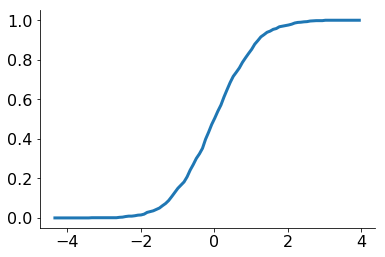

In [64]:
fig, ax = plt.subplots()
X = np.random.randn(1000)
F = ECDF(X)
F.plot(ax)

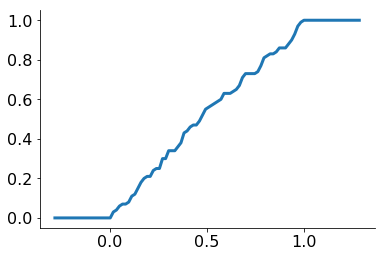

In [66]:
fig, ax = plt.subplots()
samples = [uniform(0, 1) for i in range(100)]
F = ECDF(samples)
F.plot(ax)

## 10.5 Exercises (Matplotlib)